# Lab 10 - Classification

Name: Kartikeya Sharma  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2021SP  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.graph_objects as go 
import plotly.express as px

#### 1) [P] Read about the famous Fisher's Iris dataset. This is perhaps the most commonly used dataset to teach students how to build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set :<br/><br/>Then, include the following code to import a copy of the Iris data from Seaborn's library of datasets: ```df_iris = sns.load_dataset('iris')```<br/><br/>Print out the results of ```info()``` to understand the types of each variable as read in from the csv file.


In [2]:
df_iris = sns.load_dataset('iris')

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2) [P] Be thankful for a moment, because the data are clean. However, the ```species``` variable needs work. Convert the variable to a pandas ```Categorical``` variable. Then show the distribution of your variable (how many of each species?). Repeat the ```info()``` output to show that your variable is now categorical, and not merely an object.

In [3]:
df_iris['species'] = pd.Categorical(df_iris['species'])

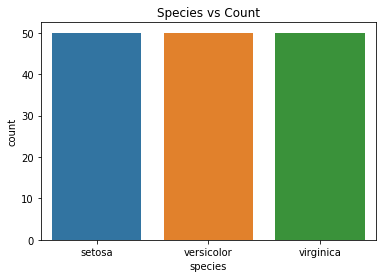

In [4]:
ax = sns.countplot(
    data=df_iris,
    x='species'
)
ax.set_title("Species vs Count");

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


#### 3) [P] Now, perform essential summarizing tasks on your data. Show the output of describe() and show the first 10 observations.

In [6]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### 4) [P] Always start with basic univariate plots. Create a single boxplot showing the distribution of each of the four independent variables on one plot, using a boxplot. Ignore the target variable ```species``` for the time. For example:<br/><br/>*output matches that given in the assignment*

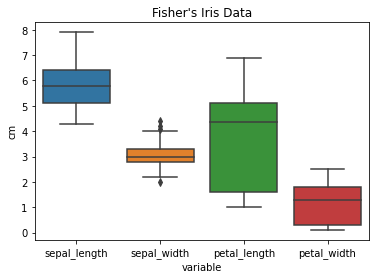

In [8]:
ax = sns.boxplot(data=df_iris)
ax.set_xlabel("variable")
ax.set_ylabel("cm")
ax.set_title("Fisher's Iris Data");

#### 5) [M/P] Violin plots are becoming increasingly common in data science. First, briefly explain what a violin plot is. Then, figure out how to generate a univariate violin plot of each independent variable. Compare and contrast your violin plot against the boxplot. (NOTE: Seaborn makes this very easy!)<br/><br/>For example, this is what it looks like with Plotly:<br/><br/>*plot is in assignment*

Like boxplots, violinplots summarize one or more numerical distributions (or, in other cases, a numerical distribution across multiple categories). It also, though, has an estimated, continuous distribution curve (kernel density plot) on both sides of the associated box-and-whisker plot.

Sources:
    1. https://www.data-to-viz.com

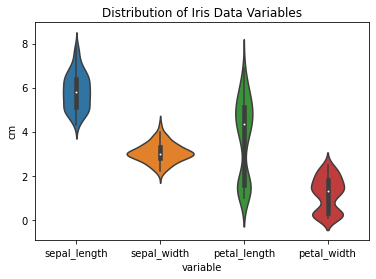

In [9]:
ax = sns.violinplot(data=df_iris)
ax.set_xlabel('variable')
ax.set_ylabel('cm')
ax.set_title('Distribution of Iris Data Variables');

Violinplots and boxplots both provide a visual, statistical summary of one or more numerical distributions, while providing a visual framework in which to compare the distributions being plotted. The statistical summary includes the minimum, first quartile, median, third quartile, and maximum of each distribution (for both the violinplots and boxplots). A violin plot also provides a visual representation around each box-and-whisker of the 'magnitude of concentration of the numerical distribution' (how many data points are concentrated at particular numerical values/ranges) rather than only the spread of the numerical distribution depicted in the box-and-whisker plots.

#### 6) [P] Show a histogram and/or a density plot of each variable on a single plot. And be sure to provide some way to see the distribution of all four variables separately. You could use alpha blending on the histogram, or perhaps consider a "rugplot" overlaid on top. For example, this is what it looks like with Plotly (NOTE: pandas can generate a density plot directly much better!)

In [10]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


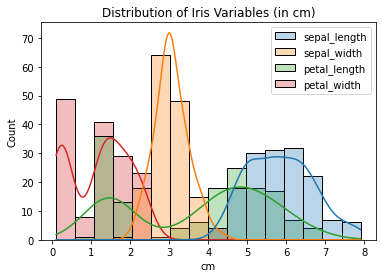

In [11]:
ax = sns.histplot(
    data=df_iris,
    kde=True,
    alpha=0.3,
    bins=16
)
ax.set_xlabel("cm")
ax.set_title("Distribution of Iris Variables (in cm)");

#### 7) [M] Summarize your findings from these plots. Is one most ideal for understanding your distribution? Characterize the distribution of your four variables. Remember, this is a univariate exploration, so you don't care about the class variable yet.

Kernel density curves provide a means for comparing and contrasting general distribution shape characteristics, including modality, amongst multiple distributions. On the other hand, histograms provide a more detailed view of the distribution in a local area, such as in which finite bin does the distribution begin and end (left-to-right). For example, it is possible that a distribution that has a very short tail has a kernel density estimation curve that does not bottom out until beyond the bin or bins that serve as the endpoint(s) of the distribution (due to the continuous estimative nature of the curve, i.e. the curve cannot "come down sharply" even if a distribution does so, hence why the bin-by-bin distribution information in a histogram is essential for estimating local/boundary phenomena).

In this analysis, I will primarily be using the kernel density curve (with supplementation of the histograms of the distributions with alpha blending) as an estimation for certain trends in a distribution for a particular variable. 

The sepal_length variable has a distribution with a higher median than that of the petal_length variable, about 5.8 cm and 4.4 cm respectively. Similarly, the median for the sepal_with variable distribution is greater than the median for the distribution of the petal_width variable, namely 3.0 cm and 1.3 cm respectively. 

The distribution for sepal_length has a range of approximately 4 cm, looking at the estimated kernel density curve plotted above the histogram displaying its distribution, whereas the range of the distribution for petal_length appearsto be about 6.5 cm, almost 1.5 times the range of the distribution for sepal_length. The distribution for sepal_width appears to have a range of about 2.5 cm and that for petal_width appears to have a distribution range of about 3 cm. 

The sepal_length distribution appears to be unimodal and have a relatively long tail, while that of pedal_length appears to be bimodal and have even longer tails. Septal_width is unimodal and quite short tailed, while petal_width is bimodal and has a relatively longer tail (and right skewed).

#### 8) [P] Use the pandas interface to generate a quick boxplot (```df_iris.boxplot()```!) However, look up how to created a faceted boxplot with each variable listed in a separate plot, automatically showing the distributions of your variables by ```"species"```.<br/><br/>*example in assingment matches that in output below*

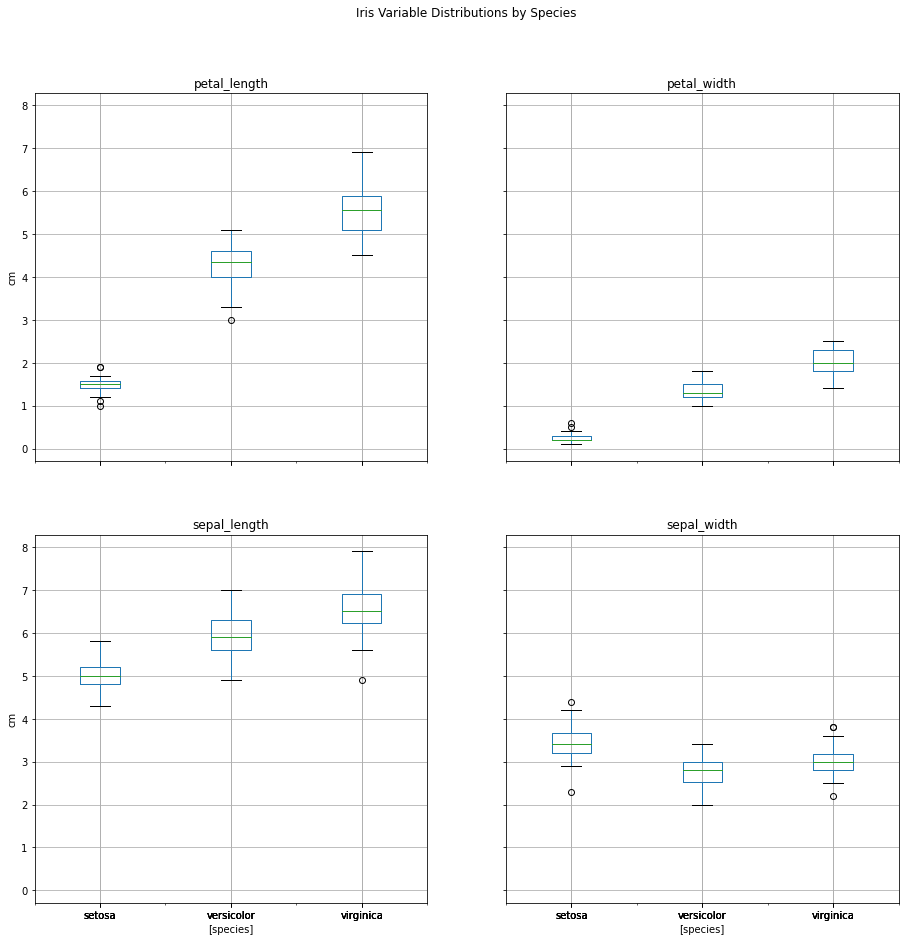

In [12]:
ax = df_iris.boxplot(
    by="species", 
    figsize=(15,15)
)
fig = ax[0][0].get_figure() # source: https://stackoverflow.com/questions/23507229/set-no-title-for-pandas-boxplot-groupby
fig.axes[0].set_ylabel("cm")
fig.axes[2].set_ylabel("cm")
fig.suptitle("Iris Variable Distributions by Species");

#### 9) [P] Use either seaborn or plotly to generate a boxplot over each variable, but now showing the three different species as distinct boxplots. For example:<br/><br/>*output below matches what is in the assignment*

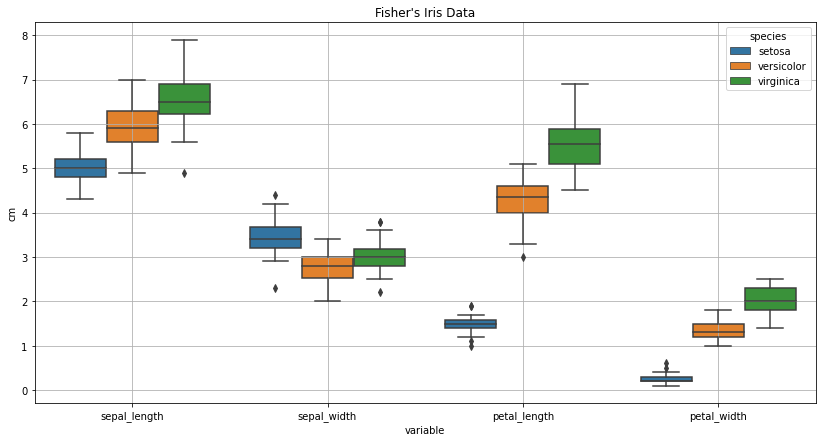

In [13]:
ax = sns.boxplot(
    data=pd.melt(df_iris, id_vars=["species"]), 
    x="variable",
    y="value",
    hue="species"
)
ax.set_ylabel("cm")
ax.set_title("Fisher's Iris Data")
ax.grid(b=True, which='major')
plt.gcf().set_size_inches(14,7)

#### 10) [P] Generate a violin plot over all variables much like the previous boxplot, but again, be sure to indicate the species as a distinct color.

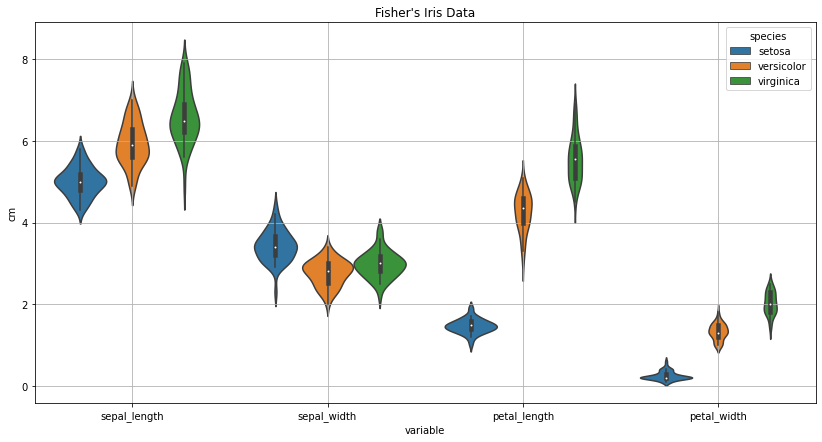

In [14]:
ax = sns.violinplot(
    data=pd.melt(df_iris, id_vars=["species"]), 
    x="variable",
    y="value",
    hue="species"
)
ax.set_ylabel("cm")
ax.set_title("Fisher's Iris Data")
ax.grid(b=True, which='major')
plt.gcf().set_size_inches(14,7)

#### 11) [P] Read about the ```scatter_matrix()``` function in pandas. Use it to generate a scatterplot matrix, and use species for the color.

In [15]:
import random

pd.options.plotting.backend = 'matplotlib'

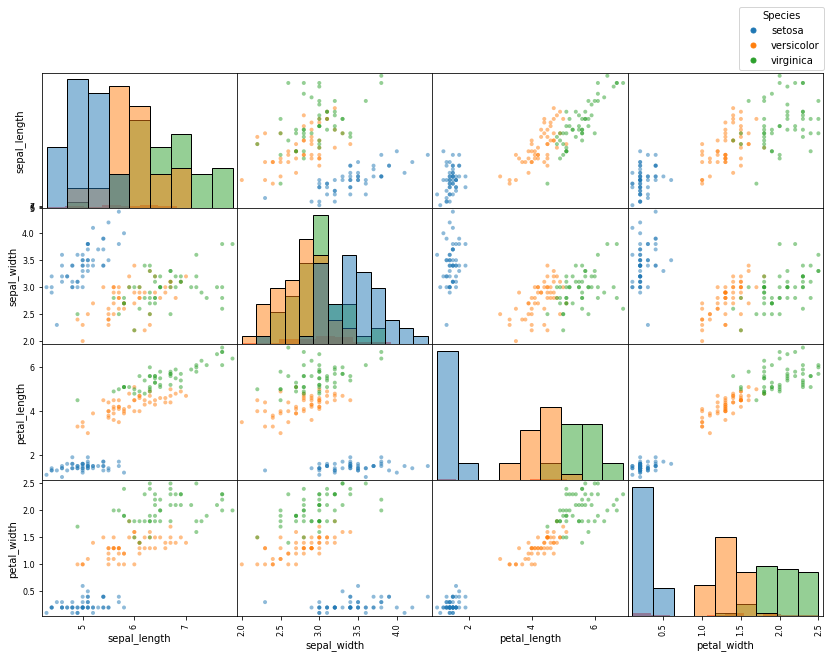

In [16]:
unique_species = df_iris["species"].unique()
species_to_rgb = dict(zip(
    unique_species, 
    sns.color_palette(n_colors=len(unique_species))
))

species_to_rgba = {}
for species, rgb_vals in species_to_rgb.items():
    rgb_vals_lst = list(rgb_vals)
    rgb_vals_lst.append(1) # alpha = 1 for opaque
    rgba_vals_tup = tuple(rgb_vals_lst)
    species_to_rgba[species] = tuple(rgba_vals_tup)

df_iris_colors = pd.Series(np.nan, index=df_iris.index, dtype="object")
for i in df_iris.index:
    df_iris_colors.loc[i] = species_to_rgba[df_iris.loc[i, "species"]] 
    
df_iris_copy = df_iris.copy(deep=True)
df_iris_copy["species"] = df_iris_colors
    
axarr = pd.plotting.scatter_matrix(
    frame=df_iris_copy, 
    c=df_iris_copy["species"],
    s=64,
    diagonal="hist",
    hist_kwds={"stacked": True, "density": True, "alpha": 0.5, "color": "red"},
    grid=True,
    figsize=(14, 10)
)

# per researching this topic, particularly https://stackoverflow.com/questions/46615094/matplotlib-stacked-histogram-using-scatter-matrix-on-pandas-dataframe, 
# even creating a stacked histogram in PairGrid, let alone in pd.plotting.scatter_matrix
# is not feasible. so, a modified approach of https://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix
# (in which they create kde curves across species) will be used
for i in range(len(axarr)):
    sns.histplot(data=df_iris_copy.loc[:,[df_iris_copy.columns[i], "species"]],
                 x=df_iris_copy.columns[i],
                 hue="species",
                 legend=False,
                 ax=axarr[i][i])
# inspired by: https://stackoverflow.com/questions/43801637/pandas-legend-for-scatter-matrix
handles = [plt.plot([],[],color=df_iris_colors.unique()[i], ls="", marker=".", \
                    markersize=np.sqrt(100))[0] \
           for i in range(len(df_iris_colors.unique()))]
labels=df_iris["species"].unique() # unique species names are already in order of
                                   # corresponding handle/color assignment
plt.legend(
    handles, labels, loc=(.57,4.02), 
    title="Species", fancybox=True
);

#### 12) [P] Read about the seaborn ```pairplot()``` function,then use it to generate one of the most useful scatterplots matrices you'll see with this data. (It won't be too different than the ```scatter_matrix``` function, just easier to create, and the diagonal density plots are much better.) Take a moment to study the plot, and really try to understand just how much information this plot is conveying. Be sure to figure out how to distinguish the species by color.

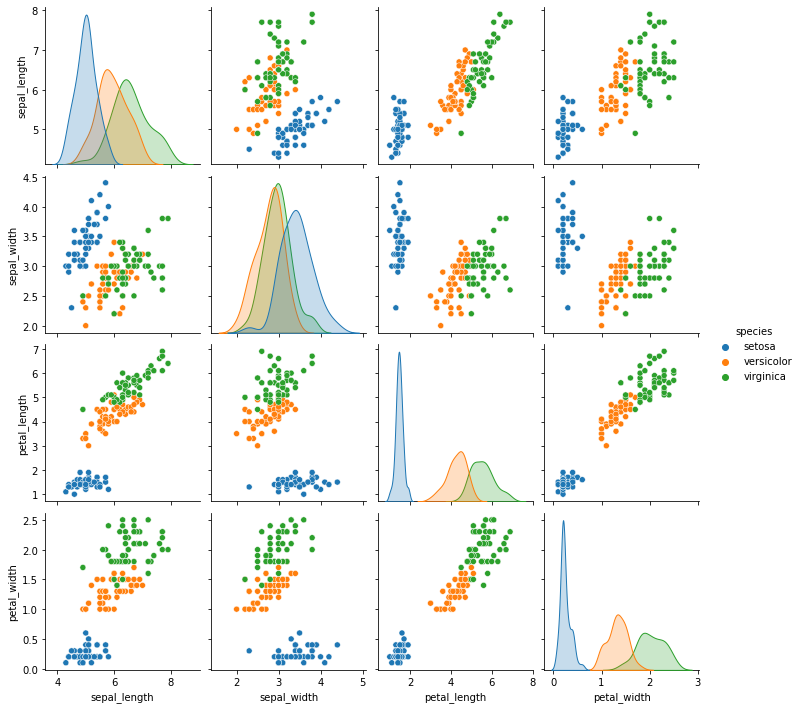

In [17]:
pg = sns.pairplot(
    data=df_iris,
    hue="species"
)

#### 13) [M] From your observations, which species do you expect to have the best classifier performance? Why?

I suspect setosa to have the best classifier performance because it is the most distinct (distinct cluster-like regions within the scatterplots, as visible in the pair scatter plots across the four numeric variables contained within Fisher's Iris Dataset) from the other species, namely versicolor and virginica, out of the three species. Also, looking at the KDE (kernel density estimation) curves for petal_length and petal_width, specifically, there appear to be almost no, if at all, overlapping scatterpoints of setosa with the other species, unlike versicolor and virginica. On the other hand, versicolor and virginica have considerable overlapping data points across the four numeric variables.

### Preparing our data for modeling

#### 14) [P] Split your data frame into ```X``` and ```y```, where ```X``` represents *only* your four predictor variables, and ```y``` represents *only* the target class, ```species```. Output the names of the columns and the shape of both just to confirm that they both have the same number of observations, and that the number of variables in each are correct. You should have (150, 4), and (150, 1) respectively.

In [18]:
X = df_iris.drop("species", axis=1)
y = df_iris["species"]

# to verify that X and Y have been appropriately set
print("X:")
display(X.head())
display(X.shape)
print("y:")
display(y.head())
display(y.shape)

X:


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

y:


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

(150,)

### Building our classifier

In [19]:
# importing "proper libraries from sklearn" in preparation
# for building the classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
# sklearn settings methods
from sklearn import set_config

#### 15) [P] Create an instance of a decision tree classifier using ```DecisionTreeClassifier()``` [sic] with default parameters. Name the classifier ```clf```. Train the classifier with the entire dataset (i.e. all of ```X``` and ```y```.) Show the classifier after training by simply include ```print(clf)``` so you can see the default parameters used to build the classifier

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X,y)
set_config(print_changed_only=False)
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')


#### 16) [P] Remember that one of the most popular reasons for using decision trees is because the model is easily visualized for model interpretation purposes. Use the ```plot_tree``` method to plot the tree. Explore the arguments to be sure that nodes are shaded by target class. Feature and class names should be shown. Your tree should look something like the following:<br/><br/>*output below matches that given in the assignment*

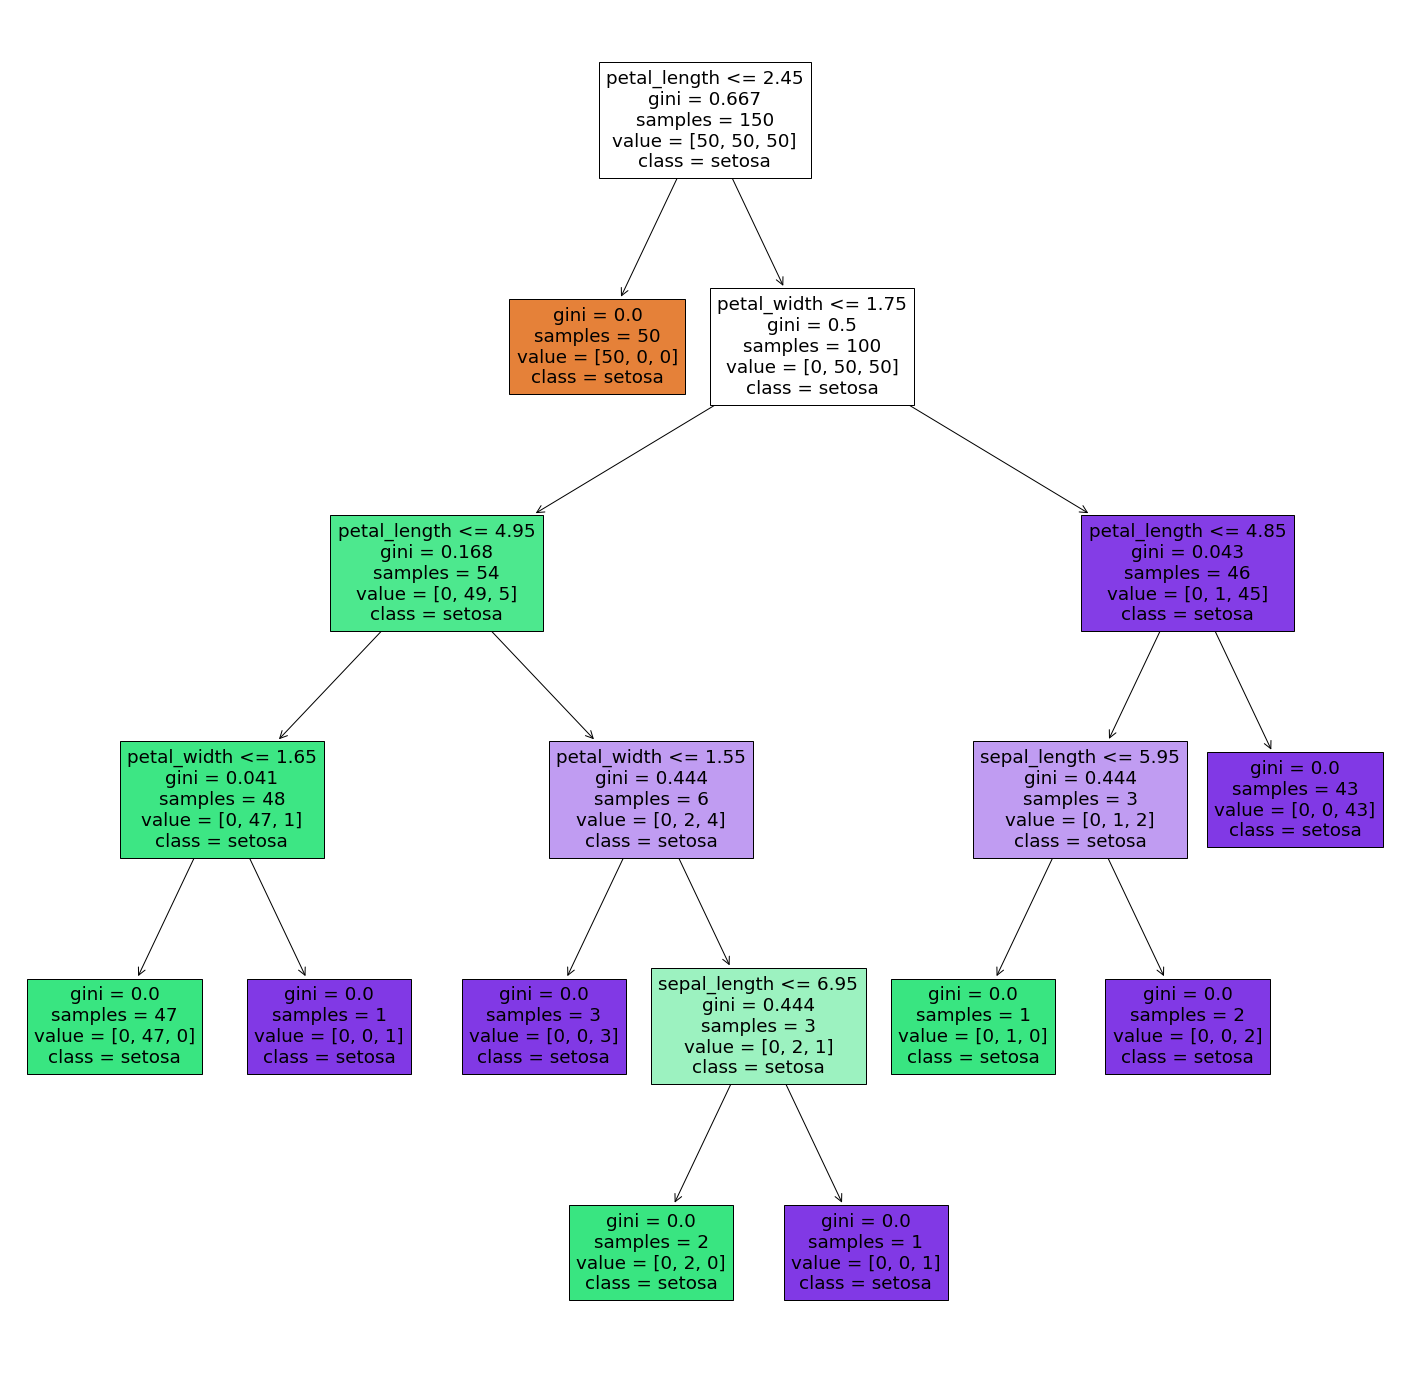

In [21]:
fig = plt.figure(figsize=(25,25))
plot_tree(clf,
          feature_names=X.columns,  
          class_names=y,
          filled=True);

#### 17) [P] - Use this model to predict back your training data to evaluate your model. Name your predictions ```y_pred```. Then, report the accuracy using the ```score``` method on the classifier.

In [22]:
y_pred = clf.predict(X)
print("y_pred (first five items):")
display(y_pred[:5]) # verifying output, that's all

print("\n")

clf_mean_acc = clf.score(X,y)
print("The mean accuracy of the DecisionTreeClassifier for " +\
      "Fisher's Iris Dataset is", clf_mean_acc, ".")

y_pred (first five items):


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)



The mean accuracy of the DecisionTreeClassifier for Fisher's Iris Dataset is 1.0 .


#### 18) [M] You should see 100% accuracy. Why are you getting a perfect score?

I am getting a perfect score because the same data that was used to create the decision tree classifier/model ('training data') is what is being used to test the accuracy of the model. It makes sense that a model that is molded around a particular data set would be near perfect, if not perfect, in classifying the same data set. 

For this particular model, we can see that the training data was fitted perfectly on the decision tree, as the classifications of values, that is, for each variable, along the path to each leaf node has one possible target class prediction. The value attribute at each leaf node represents [# data points that were setosa, #... versicolor, #... virginica]. Each leaf has a distinct number of data points that had, during training (and testing, in this case, because the same data set was used in testing as in training), a target of one of the target labels, namely setosa, versicolor, or virginica, with none of the data points being classified with a target of any of the other two respective target labels.

#### 19) [P] Let's simplify our tree structure. Create a new tree, but adjust the pruning / complexity parameters. How? We'll keep this simple. Ensure that every leaf in the tree contains at least 5 samples. Show the tree that you induced, and again store your predictions as ```y_pred```. Then, show the accuracy. (It should be 97.3%)

The mean accuracy of the DecisionTreeClassifier with a minimum of 5 samples in every leaf for the Fisher's Iris Dataset is about 97.3%.


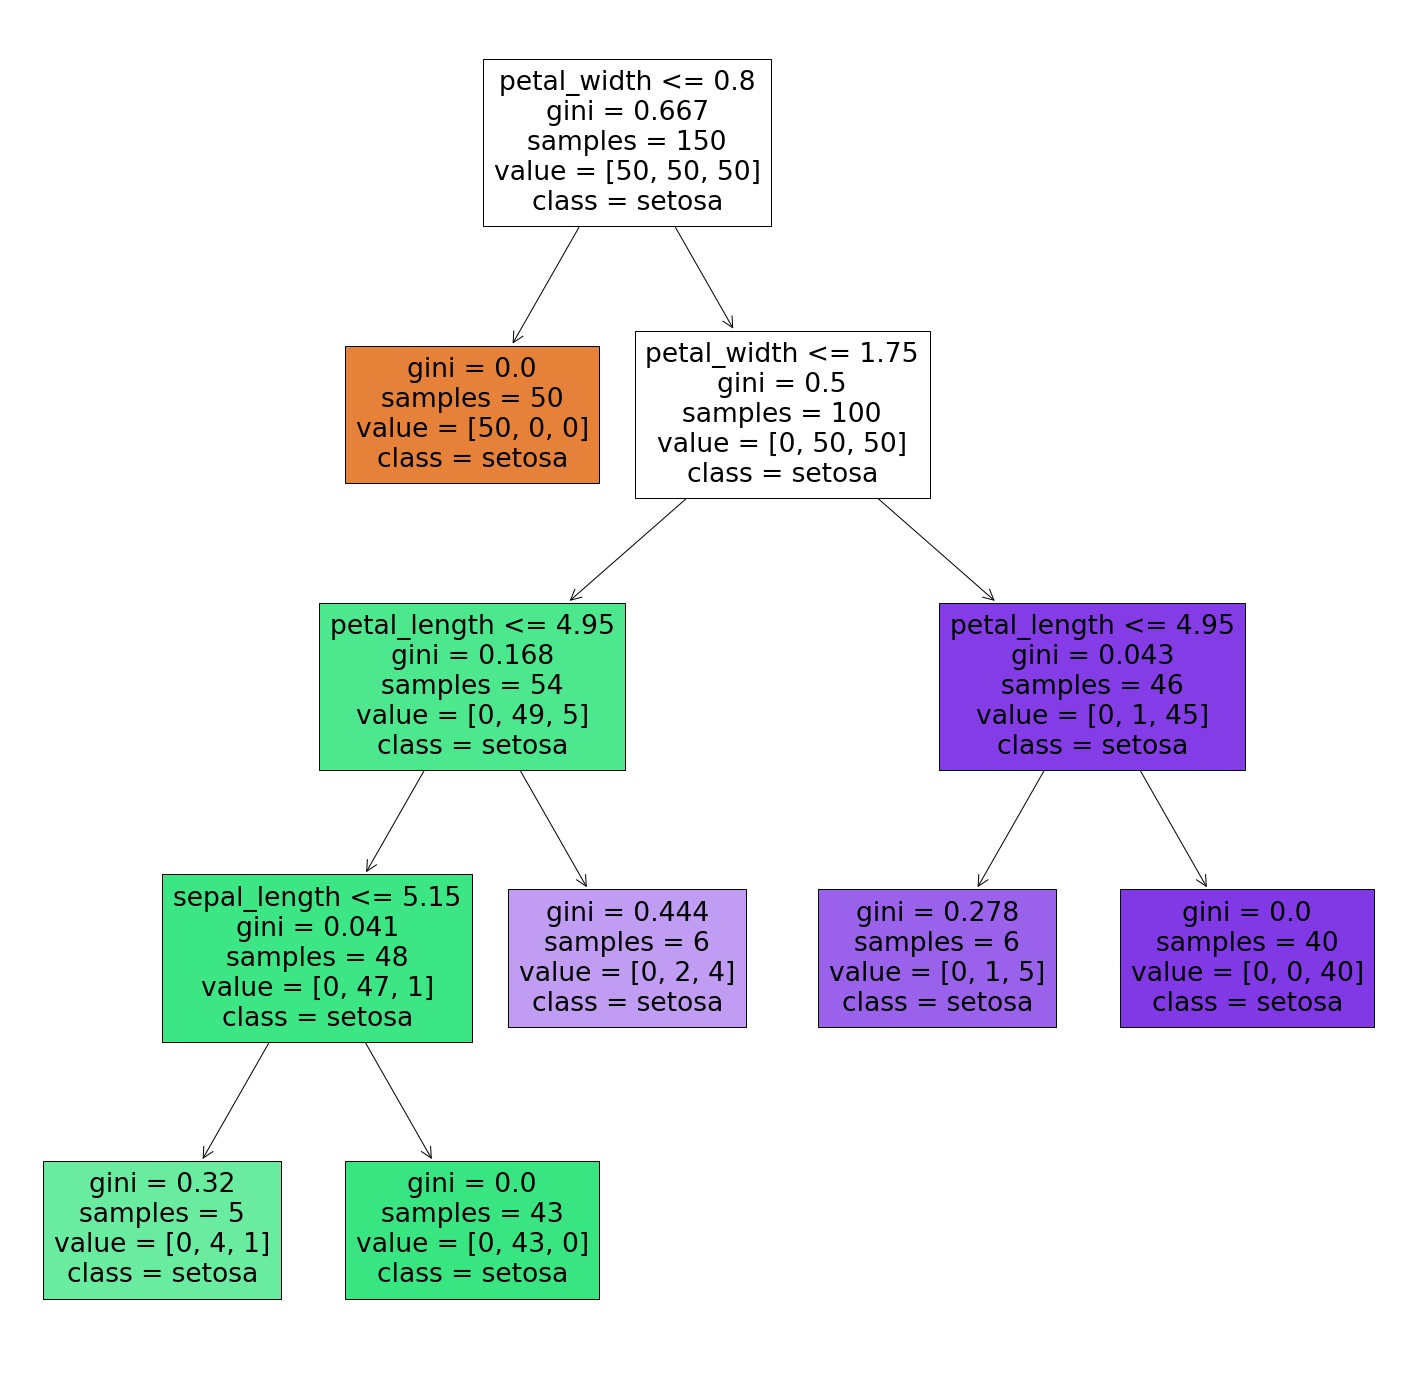

In [23]:
clf_five_min_samp_leaf = DecisionTreeClassifier(min_samples_leaf=5)
clf_five_min_samp_leaf.fit(X,y)
fig = plt.figure(figsize=(25,25))
plot_tree(clf_five_min_samp_leaf,
          feature_names=X.columns,  
          class_names=y,
          filled=True);

y_pred_five_min_samp_leaf = clf_five_min_samp_leaf.predict(X)

clf_five_min_samp_leaf_mean_acc = \
clf_five_min_samp_leaf.score(X,y)
print("The mean accuracy of the DecisionTreeClassifier with a " +\
      "minimum of 5 samples in every leaf for the " +\
      "Fisher's Iris Dataset is about " + \
      "{:.1f}".format(clf_five_min_samp_leaf_mean_acc*100) + \
      "%.")

#### 20) [M/P] OK – clearly we have lower accuracy. Dive deeper. Accuracy is usually not a good measure of classifier performance. Look up the function ```classification_report```. This outputs a lot of performance information!<br/><br/>(You are strongly encourages (not required) to delve into understanding what the micro, macro, and weighted average readings mean. Take notes in this section if you are inclined to do so. This function will do a LOT for you!)<br/><br/>Which class had the lowest precision? Which had the lowest recall?

In [24]:
from sklearn.metrics import classification_report

In [25]:
cr = classification_report(
    y, y_pred_five_min_samp_leaf, 
    target_names=y.unique() # already in order
)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Virginica had the lowest precision. Versicolor had the lowest recall.

#### 21) [P] Output a confusion matrix using the ```confusion_matrix``` method in ```sklearn.metrics```. Your result should look like a square matrix, where rows are the true labels, and the columns are the predicted labels, and the diagonal represents the cases where the true label and predicted label match.<br/><br/>*output below matches that given in the assignment*

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(
    y, y_pred_five_min_samp_leaf,
    labels=y.unique() # already in order
)
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


#### 22) [P] Even better! Use the ```plot_confusion_matrix``` to output an excellent visual summary of the classifier performance. Your result should look as follows: *output below matches that given in the assignment*

In [28]:
from sklearn.metrics import plot_confusion_matrix

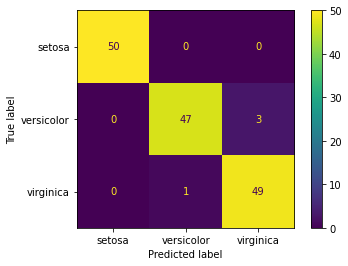

In [29]:
plot_confusion_matrix(
    clf_five_min_samp_leaf, X, y,
    labels=y.unique()
);

 #### 23) [M] Interpret your confusion matrix and classification report. Which class is performing the best? Which is performing the worst? How many total incorrect predictions?

As predicted earlier in the assignment, setosa is performing the best, predicting 50 out of its 50 data points (perfectly), i.e. where the true label was setosa, correctly. On the other hand, versicolor and virginica were only able to predict 47 out of 50 and 49 out of 50 of their respective data points that had a true label of their respective class. Given the 47/50 metric, compared with the 49/50 and 50/50 metrics, versicolor appears to be performing the worst. There were four incorrect predictions. Three of those predictions predicted virginica, instead of versicolor, which was the true label in these cases. And, one of those predictions predicted versicolor, instead of virginica, which was the true label in this case.

#### 24) You need to create a train / test split of your data to properly validate your model. Read about the function called ```train_test_split```. in the package ```sklearn.model_selection```. Then, use it to split your data into an 70% / 30% split of training and testing data, respectively. You should end up with four data frames, denoted ```X_train```, ```X_test```, ```Y_train```, ```Y_test```. Use an initial random seed of 0. Be sure to shuffle the data (verify that this is a default setting.) Show the dimensions of each of these (i.e. how many entries in each?)<br/><br/>NOTE: Technically, ```train_test_split```, like most scikit-learn modules, ignore pandas, and return numpy arrays. If you properly set up your data, and maintain your types throughout, it will do a reasonable job maintaining those types. I generally find it's important to keep my data, and splits, my predicted values, etc. all as pandas DataFrames, but this is a matter of preference. If you are missing your column and index variables, it's most likely because you lost type information at some point in your pipeline. Just cast your data back to a pandas DataFrame and restore those important variables.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
def _print_twod_pd_arr_info(pd_arr, suffix="\n\n"):
    display(pd_arr.head())
    print("Shape: " + str(pd_arr.shape))
    _print_twod_dims_from_shape(pd_arr)
    _print_num_entries(pd_arr)
    print(suffix)

def _print_twod_dims_from_shape(pd_arr):
    dims = ""
    if len(pd_arr.shape) == 2:
        dims = str(pd_arr.shape[0]) + " x " + str(pd_arr.shape[1])
    elif len(pd_arr.shape) == 1:
        dims = str(pd_arr.shape[0]) + " x " + str(1)
    else: 
        raise Exception("Please enter a pandas-based array " + \
                        "with one or two dimensions.")
    print("Dimensions (# rows x # cols): " + \
          dims)
    
def _print_num_entries(pd_arr):
    num_entries = -1
    if len(pd_arr.shape) == 2:
        num_entries = pd_arr.shape[0] * pd_arr.shape[1]
    elif len(pd_arr.shape) == 1:
        num_entries = pd_arr.shape[0]
    else: 
        raise Exception("Please enter a pandas-based array " + \
                        "with one or two dimensions.")
    print("Number of entries: " + \
          str(num_entries))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.7, 
    test_size=0.3, 
    random_state=0, 
    shuffle=True
)

# verifying variables via output
print("X_train:")
_print_twod_pd_arr_info(X_train)
print("X_test:")
_print_twod_pd_arr_info(X_test)
print("y_train:")
_print_twod_pd_arr_info(y_train)
print("y_test:")
_print_twod_pd_arr_info(y_test, suffix="")

X_train:


,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


Shape: (105, 4)
Dimensions (# rows x # cols): 105 x 4
Number of entries: 420



X_test:


,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


Shape: (45, 4)
Dimensions (# rows x # cols): 45 x 4
Number of entries: 180



y_train:


60     versicolor
116     virginica
144     virginica
119     virginica
108     virginica
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Shape: (105,)
Dimensions (# rows x # cols): 105 x 1
Number of entries: 105



y_test:


114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Shape: (45,)
Dimensions (# rows x # cols): 45 x 1
Number of entries: 45



#### 25) Create a new instance of ```DecisionTreeClassifier``` with an initial random seed value of 100, and a minimum number of samples in a leaf set to 5. Store the classifier as ```clf```. Train your classifier with your training data.

In [33]:
clf = DecisionTreeClassifier(
    min_samples_leaf=5, 
    random_state=100 # random_state is assumed to be the 
                     # 'initial random seed'
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=100,
                       splitter='best')

#### 26) Use this model to predict the labels on your training data and your test data. Call your predictions ```y_pred_train```. and ```y_pred_test```. Show the accuracy of your classifier on both your training data and test data.

In [34]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Classification Report of Model on X_train:")
print(classification_report(
    y_train, y_pred_train, 
    target_names=y.unique() # already in order
))
print()
print("Classification Report of Model on X_test:")
print(classification_report(
    y_test, y_pred_test, 
    target_names=y.unique() # already in order
))

Classification Report of Model on X_train:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.91      0.97      0.94        32
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105


Classification Report of Model on X_test:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.94      0.89        18
   virginica       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



The accuracy of the decision tree classifier predicting the labels corresponding to the data points within the training data set was 96%, whereas the decision tree classifier predicting the labels corresponding to those within the test data set was 91%. The accuracy of the latter (```clf``` predictions on ```X_test```) was 5% below the former (```clf``` predictions on ```X_train```).

#### 27) [P/M] Use the classification report *(shown above)* and confusion matrix techniques discussed above to assess the performance of your classifier on both the training and the test data. Summarize your findings.

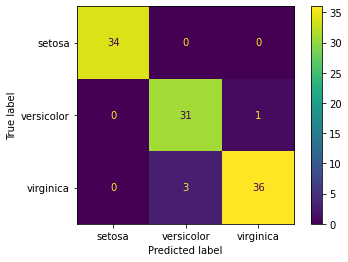

In [35]:
# classification reports above (related to X_train and X_test)
cm_train = plot_confusion_matrix(
    clf, X_train, y_train,
    labels=y.unique() # already in order
);

Confusion Matrix Report of Model on X_test:


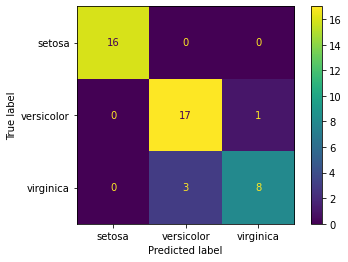

In [36]:
# need to have them in two separate cells to have
# the confusion matrix plots render correctly
print("Confusion Matrix Report of Model on X_test:")
cm_test = plot_confusion_matrix(
    clf, X_test, y_test,
    labels=y.unique() # already in order
);

As the name of confusion matrix suggests, the amount of 'confusion' (inaccurate predictions) between setosa and the other two true labels was zero (false positives and/or false negatives) across the model's performance both on the training data and on the test data. 

Predictions of the label versicolor and label virginica do have, on the other hand, inaccuracies among them. With regards to the model predictions on the training data, there were three occasions where the predicted label was versicolor when the true label was virginica, and there was one occasion where the predicted label was virginica when the true label was versicolor. With regards to the model predictions on the test data, there were three occasions where the predicted label was versicolor when the true label was virginica, and there was one occasion where the predicted label was virginica when the true label was versicolor (coincidentally the same two observations that were aforementioned regarding the model predictions on the training data).

Now examining the classification reports, the accuracy of the decision tree classifier predicting the labels corresponding to the data points within the training data set was 96%, whereas the decision tree classifier predicting the labels corresponding to those within the test data set was 91%. The accuracy of the latter (```clf``` predictions on ```X_test```) was 5% below the former (```clf``` predictions on ```X_train```).

Among the model predictions on the training data and then the test data, the precision, recall, and F1 score for all 1.0. A precision of 1.0 means that none of the predictions that had the predicted label as setosa were false; each time when a prediction of setosa as the label was made, it was correct. A recall of 1.0 means that all of the observations with a true label of setosa were correctly predicted to have a label of setosa. The F1 score takes into account the precision and recall values, which, in turn, take into account the false positives and false negatives of a particular label; because the precision and recall values for the setosa label were 1.0, the F1 score was also 1.0. Without listing each value of precision, recall, and F1 score for versicolor and virginica for the model's predictions on both data sets, I will provide an even broader summary (and, for the sake of brevity, I will not attempt to rehash the performance comparison with macro avg and weighted avg). Overall, when looking at the model's predictions on both the training data and on the test data, versicolor had lower precision than virginica, but virginica had lower record than versicolor; both labels across both data sets (for their precision, recall, and f1-score metrics) had values less than 1.0. In essence, predictions of the label versicolor were the least likely to be accurate out of all three labels. And, out of all of the true label observations for each class, those for virginica were the least likely to be accurately labeled as such. According to the F1 scores, virginica performed similarly with respect to versicolor and with regards to the model's predictions on the training data (1% difference is insigifnicant); on the other hand, according to the F1 scores as well, versicolor performed better than virginica (9% difference) with regards to the model's predictions/classifications on the test data.

It should also be noted that the support across the labels was somewhat fluctuating within the training data set and the test data set, even though the original data set had uniform support across all of the labels.

#### 28) [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to determine which observations are being misclassified. Use data selection techniques to output the data that are being misclassified in the test data only.

In [37]:
# part of the test data is the true labels for the 
# independent variables in the test data as well
# so, I'm concatenating them in one DataFrame
df_iris_test = pd.concat([X_test, y_test], axis=1)
# now the selection
df_iris_test[df_iris_test["species"]!=y_pred_test]

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,virginica
126,6.2,2.8,4.8,1.8,virginica
127,6.1,3.0,4.9,1.8,virginica
83,6.0,2.7,5.1,1.6,versicolor


#### 29) [P] It's even more interesting when you can visualize where in your feature space your classifier might be missing something. Create a scatterplot matrix, but this time, highlight the instance(s) that are being misclassified.<br/><br/>(HOW? Can you create a new variable that represents the accuracy of the prediction? Use it as another dimension? A new color? A larger point size? Any scatter plot you can come up with that will highlight the location of the misclassified data receives full credit. This is an important step in understanding how to deal with problematic data.)<br/><br/>For example, this is one square of a scatter matrix that highlighted the observations that were mis-classified. This is a nice visual indicator that, as expected, they were instances falling on the divide between versicolor and virginicia<br/><br/>*output below captures the essence of the image given in the assignment*<br/><br/>So, that was awesome, right? ("Yes, I know!" you say.) But, you aren't following the standard industry practice of performing true *k-fold cross validation*.

In [38]:
df_iris_test["accurate"] = df_iris_test["species"]==y_pred_test
df_iris_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,accurate
114,5.8,2.8,5.1,2.4,virginica,True
62,6.0,2.2,4.0,1.0,versicolor,True
33,5.5,4.2,1.4,0.2,setosa,True
107,7.3,2.9,6.3,1.8,virginica,True
7,5.0,3.4,1.5,0.2,setosa,True


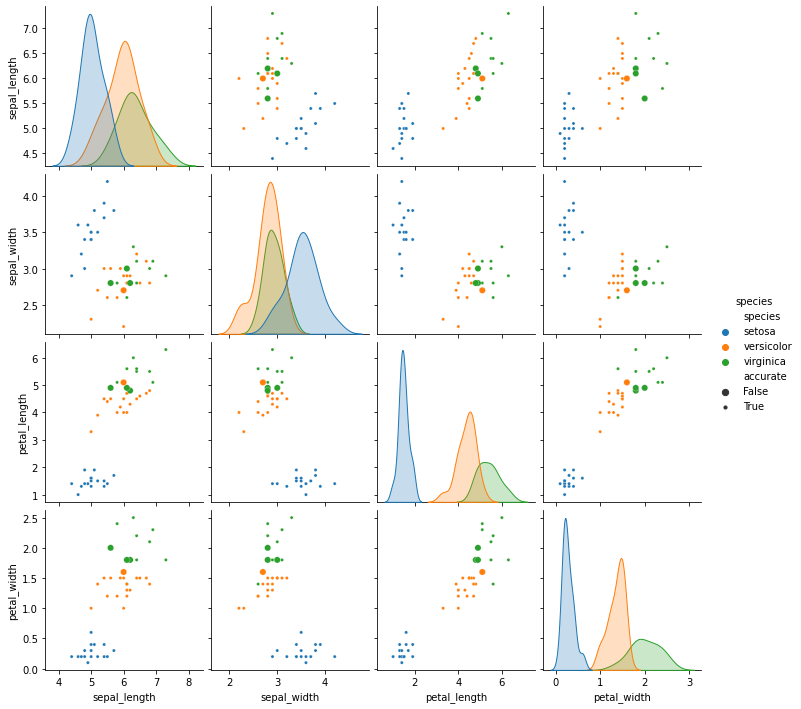

In [39]:
# chose to make the True points very small for this purpose
# to clearly isolate the False points for visual purposes
pg = sns.pairplot(
    data=df_iris_test,
    vars=df_iris_test.columns[0:4],
    hue="species",
    plot_kws={"data": df_iris_test, 
              "size": "accurate", 
              "sizes": (10,40)}
)

### K-fold Cross Validation

#### 30) [M/P] Read about the ```KFold``` class. State what a ```KFold``` cross validation object will do for you. Then, create an instance of ```KFold``` with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your instance ```kfold```

In [40]:
from sklearn.model_selection import KFold

The ```KFold``` cross validation object splits the data set into k sequential partitions, where each partition is used as for validation one time while the other respective k-1 partitions are used for training.<sup>1</sup> (This cross validation object also provides indices at which the data should be split to form the partitions, specifically into sets for training and for testing.<sup>1</sup>)

Sources:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [41]:
# parameters
n_splits = 10
random_seed = 100

In [42]:
kfold = KFold(
    n_splits=n_splits, 
    shuffle=True, 
    random_state=random_seed
)

#### 31) [P] Read about the ```split()``` method for ```KFold```. It will help you iterate through each fold of your data. Take the time to understand how it works! If you set this up right, you will have a loop that will let you easily select train and test data for each fold. Once you do that, then you are merely repeated what you did already for the 70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the model on the test data for the same fold. After 10 folds, you will have validated your model using your entire dataset as validation data!<br/><br/>Inside your loop, you should NOT print out your classification results yte. (However, sometimes it's useful to use Python timing functions to collect timing on different model building tasks, and that would be done inside the loop, placing a time stamp before and after the call to ```fit()```.) Only store the results of predicting on the test fold. I would accumulate my true class label and my predictions in a separate data frame, called ```df_results```.<br/><br/>If you do this right, you will have a new data frame with a variable, such as "```dt_def```", or "```dt_default```", representing the prediction from the default decision tree classifier.

In [68]:
clf = DecisionTreeClassifier() # default decision tree

columns = X.columns
columns = columns.union([y.name], sort=False)
columns = columns.union(
    ["dt_def"], 
    sort=False
)
lst_set_indices = [i for i in range(n_splits)]
lst_obs_indices = [i for i in range(int(y.size/n_splits))]
df_results_index = pd.MultiIndex.from_product(
    [
        lst_set_indices,
        lst_obs_indices
    ],
    names=["set_num", "index"]
)
df_results = pd.DataFrame(columns=columns, index=df_results_index)
si = 0 # set index
for train_index, test_index in kfold.split(X, y=y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    
    clf.fit(X_train, y_train)
    y_pred_test = pd.Series(
        clf.predict(X_test), 
        name="dt_def"
    )
    
    X_test = X_test.reset_index(drop=True, inplace=False)
    y_test = y_test.reset_index(drop=True, inplace=False)
    y_pred_test = y_pred_test.reset_index(drop=True, inplace=False)
    
    df_results_for_set = \
    pd.concat(
        {si : X_test.join([y_test, y_pred_test], sort=False)},
        names=['set_num', "index"]
    ) # inspired by https://stackoverflow.com/questions/14744068/prepend-a-level-to-a-pandas-multiindex
    
    df_results.loc[si] = \
    df_results_for_set
    
    si+=1
    
display(df_results.head()) # verifying output to check for
display(df_results.tail()) # expected output/behavior

sepal_length sepal_width petal_length petal_width species  \
set_num index                                                             
0       0              4.9         3.0          1.4         0.2  setosa   
        1              4.8         3.4          1.6         0.2  setosa   
        2              5.7         4.4          1.5         0.4  setosa   
        3              5.0         3.4          1.6         0.4  setosa   
        4              5.2         3.4          1.4         0.2  setosa   

               dt_def  
set_num index          
0       0      setosa  
        1      setosa  
        2      setosa  
        3      setosa  
        4      setosa

sepal_length sepal_width petal_length petal_width     species  \
set_num index                                                                 
9       10             5.1         2.5          3.0         1.1  versicolor   
        11             6.3         2.9          5.6         1.8   virginica   
        12             7.3         2.9          6.3         1.8   virginica   
        13             6.0         3.0          4.8         1.8   virginica   
        14             6.2         3.4          5.4         2.3   virginica   

                   dt_def  
set_num index              
9       10     versicolor  
        11      virginica  
        12      virginica  
        13      virginica  
        14      virginica

#### 32) [P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix. NOTE: You won't be able to use the ```plot_confusion_matrix``` method here, but you should be able to use the confusion_matrix method and seaborn's ```heatmap``` method. For example (using a poor color map!):

In [44]:
print(classification_report(
    df_results["species"], 
    df_results["dt_def"],
    target_names=y.unique() # already in order
))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.90      0.94      0.92        50
   virginica       0.94      0.90      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [45]:
cm = confusion_matrix(
    df_results["species"],
    df_results["dt_def"],
    labels=y.unique() # already in order
)
df_cm = pd.DataFrame(data=cm, index=y.unique(), columns=y.unique())
display(df_cm)

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,47,3
virginica,0,5,45


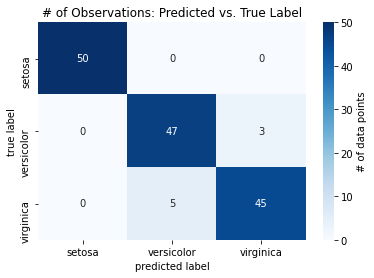

In [46]:
sns.heatmap(
    data=df_cm, 
    annot=True, 
    cmap="Blues",
    xticklabels=True, 
    yticklabels=True,
    cbar_kws={'label': '# of data points'}
)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("# of Observations: Predicted vs. True Label");

#### 33) [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified

In [61]:
df_results_misclass = df_results[
    df_results["species"]!=\
    df_results["dt_def"]
] 
# all misclassified tests
display(df_results_misclass) # set_num = test trial #

sepal_length  sepal_width  petal_length  petal_width  \
set_num index                                                         
1       7               6.7          3.0           5.0          1.7   
2       13              6.0          2.2           5.0          1.5   
4       11              6.3          2.8           5.1          1.5   
5       6               5.9          3.2           4.8          1.8   
        9               6.0          2.7           5.1          1.6   
6       10              4.9          2.5           4.5          1.7   
        13              7.2          3.0           5.8          1.6   
9       13              6.0          3.0           4.8          1.8   

                  species      dt_def  accurate  
set_num index                                    
1       7      versicolor   virginica         0  
2       13      virginica  versicolor         0  
4       11      virginica  versicolor         0  
5       6      versicolor   virginica         0  
        9      versicolor   virginica         0  
6       10      virginica  versicolor         0  
        13      virginica  versicolor         0  
9       13      virginica  versicolor         0

In [64]:
df_results["accurate"] = 1
df_results.loc[df_results_misclass.index, "accurate"] = 0

In [65]:
df_results.loc[:,"sepal_length"] = \
df_results["sepal_length"].astype(float)
df_results.loc[:,"sepal_width"] = \
df_results["sepal_width"].astype(float)
df_results.loc[:,"petal_length"] = \
df_results["petal_length"].astype(float)
df_results.loc[:,"petal_width"] = \
df_results["petal_width"].astype(float)
df_results.loc[:,"species"] = \
df_results["species"].astype("category")
df_results.loc[:,"dt_def"] = \
df_results["dt_def"].astype("category")
df_results.loc[:,"accurate"] = \
df_results["accurate"].astype("bool")
df_results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 150 entries, (0, 0) to (9, 14)
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
 5   dt_def        150 non-null    category
 6   accurate      150 non-null    bool    
dtypes: bool(1), category(2), float64(4)
memory usage: 10.9 KB


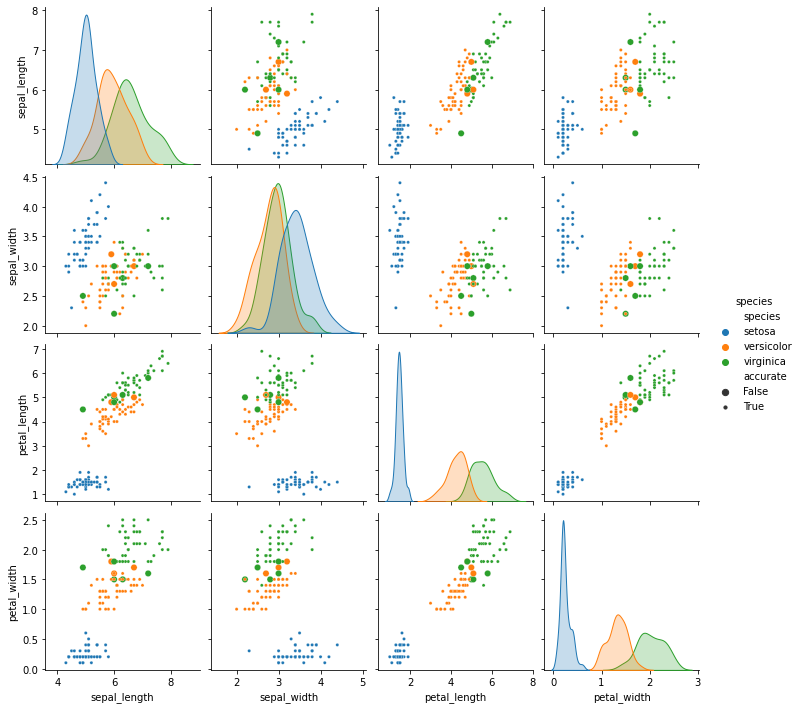

In [66]:
pg = sns.pairplot(
    data=df_results,
    vars=df_results.columns[0:4],
    hue="species",
    plot_kws={"data": df_results, 
              "size": "accurate", 
              "sizes": (10,40)}
)

#### 34) [P] As you would expect, the scikit-learn framework has some powerful methods that can run an entire cross validation and report whatever metrics you want. Read about the ```cross_validate``` method, then use it to run a 10-fold cross validation on a default decision tree, reporting back '```accuracy```' and '```f1_macro```' measurements on both the training and testing data. Report your results as a single data frame. Your results should look as follows.<br/><br/>*output below is similar to what is given in the assignment*

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
clf = DecisionTreeClassifier() # default decision tree

cv = cross_validate(
    estimator=clf,
    X=X,
    y=y,
    cv=10,
    scoring=["accuracy", "f1_macro"],
    return_train_score=True
)
pd.DataFrame(cv) # due to random component of cv & no random seed,
                 # it will be slightly different from the
                 # output of the assignment

#### 35) [M] On the above, what are the variables ```fit_time``` and ```score_time```?

For context, each split, or cv (cross validation) split, has a particular training data set and test data set that is generated from the split, which, in turn, is done through the (10-fold, in this case) cross validation splitting strategy. Also, the classifying estimator will be assumed to be the Decision Tree, and the classification model will be assumed to be the decision tree model, at least in this case.

```fit_time```, for *each* split, is the time (in seconds) that the sklearn ```cross_validate``` method took to apply the classifying estimator on the particular training data set of that split to ultimately create the classification model for that split.

```score_time```, for *each* split, is the time (in seconds) that the sklearn ```cross_validate``` method took to create all of the scores (by testing the model on the test data of that split) to describe the trained model's (for that split) ability to predict the true labels of the test data (once again, for that split only).

P.S. I had to assume that the units for ```fit_time``` and ```score_time``` were in seconds based upon the slightly related page https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=fit_time, as https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html?highlight=fit_time did not specify the units for these metrics, explicitly at least.

#### 36) [P] OK, one last function for validation purposes. Read about the function ```cross_val_predict```. This is perhaps among the most powerful of the model selection functions provided by sklearn, as it will generate predictions. You can then use these predictions to run a ```classification_report``` and report confusion matrices. Use the ```cross_val_predict``` function to run a 10-fold cross validation with a default decision tree, and print the ```classification_report``` on your results

The ```cross_val_predict``` method produces label predictions based upon the training data and the test data of each split from the cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred_cvp = cross_val_predict(
    estimator=clf,
    X=X,
    y=y,
    cv=10,
    method="predict"
) # predicted labels via cross_val_predict, Decision Tree
  # Classifier, and 10-fold cross validation

In [ ]:
print(classification_report(y, y_pred_cvp))

In [ ]:
# confusion matrix and heat map, just to see
# confusion matrix:
cm_cvp = confusion_matrix(
    y,
    y_pred_cvp,
    labels=y.unique() # already in order
)
# pd.DataFrame object with the confusion matrix:
df_cm_cvp = pd.DataFrame(
    data=cm_cvp, 
    index=y.unique(), 
    columns=y.unique()
)
# heatmap:
sns.heatmap(
    data=df_cm_cvp, 
    annot=True, 
    cmap="Blues",
    xticklabels=True, 
    yticklabels=True,
    cbar_kws={'label': '# of data points'}
)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("# of Observations: Predicted vs. True Label");

37) For your last task, you will perform model comparison tasks. Use the ```cross_val_predict``` method to compare the predictive performance on the following models:<br/>a. A default decision tree<br/>b. A decision tree with "entropy" for measuring impurity<br/>c. A ```KNeighborsClassifier``` with a two different values of k (.)<br/>d. ```MultinomialNB``` classifier (sklearn's Naïve Bayes implementation)<br/><br/>Compare and contrast the performance results between the different models. Which one would you choose?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# parameters
clf_a = DecisionTreeClassifier() # default decision tree
clf_b = DecisionTreeClassifier(criterion='entropy')
clf_ca = KNeighborsClassifier(n_neighbors=3)
clf_cb = KNeighborsClassifier(n_neighbors=7)
clf_d = MultinomialNB()

In [ ]:
# a. default decision tree
y_pred_cvp_a = \
cross_val_predict(clf_a, X, y, cv=10, method="predict")

# b. decision tree with "entropy" for measuring impurity
y_pred_cvp_b = \
cross_val_predict(clf_b, X, y, cv=10, method="predict")

# c. KNeighborsClassifier with two different values of k
y_pred_cvp_ca = \
cross_val_predict(clf_ca, X, y, cv=10, method="predict")
y_pred_cvp_cb = \
cross_val_predict(clf_cb, X, y, cv=10, method="predict")

# d. MultinomialNB classifier (Naive Bayes)
y_pred_cvp_d = \
cross_val_predict(clf_d, X, y, cv=10, method="predict")

In [ ]:
print(classification_report(y, y_pred_cvp_a))
print(classification_report(y, y_pred_cvp_b))
print(classification_report(y, y_pred_cvp_ca))
print(classification_report(y, y_pred_cvp_cb))
print(classification_report(y, y_pred_cvp_d))

Across all of the classifiers performed for this analysis, setosa had a precision, recall, and f1-score of 100%; this has been expected due to its distinct spatial region, relatively distant from the spatially-intersecting versicolor and virginica labels, within the feature space.

The two decision trees, i.e. one using gini and one using entropy to build the decision tree classifier, had consistent precision, recall, and F1 scores for versicolor and virginica at 94%. Their accuracy was 96% each, which was in the middle of the accuracies the naive bayes and kneighbors classifiers, which were at 95% and 97%, respectively. 

The 2 KNeighborhors classifiers each with a different value of k had the same level of accuracy, i.e. 97%; however, their precision and recall percentages for versicolor and virginica were different, in that the classifier with the higher k value (k=7) had a higher fluctuation in precision and recall values for versicolor and virginica relative to the classifier with the lower k value (k=7).

The naïve bayes classifier had an accuracy of 95%, which was the lowest out of all of the classifiers used in this analysis. The precision and recall values (across versicolor and virginica) were either worse than or the same as the KNeighbors classifier with a k of 7. Relative to the KNeighbors classifier with the lower k of 3, the precision and recall values (across versicolor and virginica) were consistently worse for the naive bayes classifier.

If I were to pick a model, it would be the KNeighbors classifier with the relatively low k (in this case, that would be 3) because it has the highest accuracy (along with the KNeighbors classifier with the higher k of 7, in this case) *and* has less variability in precision and recall values amongst versicolor and virginica. It should be noted that the percentage differences among many of these metrics are only some percentage points from one another and, hence, this analysis should still be taken with a grain of salt. Further testing of these models with a broader of parameters for each model, along with a larger data set, may be needed in order to gain more confidence as to which model may be more, if not the most, effective. Also, the best model suited for a particular problem will depend on if, in that particular problem, there is a need for more, for example, precision in one label or recall in another label (in this case, the one label or another label might be versicolor or virginica).